1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import stats, integrate
import pandas as pd
import seaborn as sns


Integral of the sum of gaussians -292.38000940871746
Sumof the initial istogram 300.0


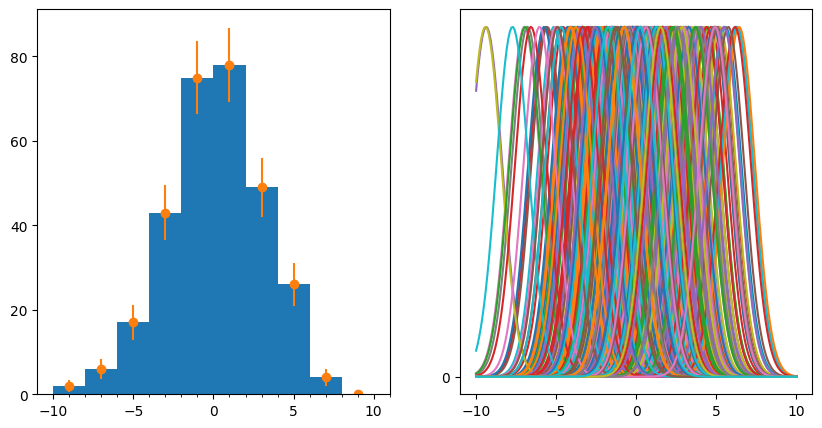

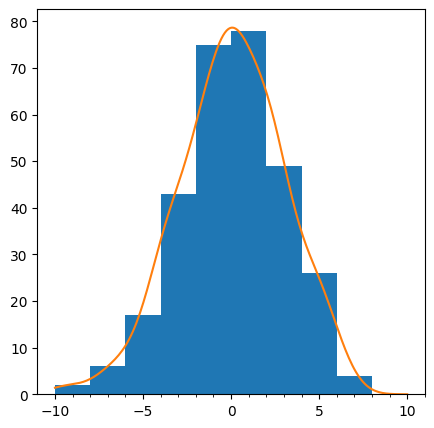

In [2]:
# FIRST PLOT
np.random.seed(19680801)
X = np.random.normal(0, 3, 300)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
y_hist, x_hist, _ = ax1.hist(X, range(-10, 11, 2))
bin_center = (x_hist[:-1] + x_hist[1:])/2
ax1.errorbar(bin_center, y_hist, yerr=np.sqrt(y_hist), fmt='o')
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
binsize = bin_center[1] - bin_center[0]
plt.yticks(range(0, int(y_hist.max())+1, 5))
# plt.xticks(range(int(x.min()), int(x.max())))



# SECOND PLOT
observation = np.linspace(-10, 10, 200)
sigma = 1.06*X.std()*X.size**(-1/5)
gaussians = []
for a in X:
    gaussians.append(stats.norm.pdf(observation, loc=a, scale=sigma))
    ax2.plot(observation, gaussians[-1])



# THIRD PLOT
fig2, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

gaussian = np.sum(gaussians, axis=0)
ax.hist(X, range(-10, 11, 2))
ax.plot(observation, gaussian*binsize) # Print the normalized gaussian



# COMPARISON BETWEEN HISTOGRAM AND GAUSSIAN SUM:
print('Integral of the sum of gaussians', integrate.trapz(observation, gaussian))
print('Sumof the initial istogram', y_hist.sum())

plt.show()


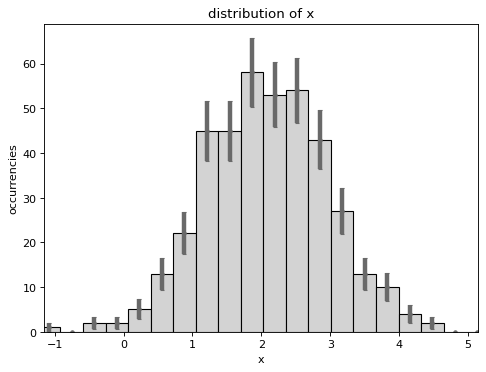

area gaussian (pre-norm): 395.20554270726643
area histogram: 124.92798269974416


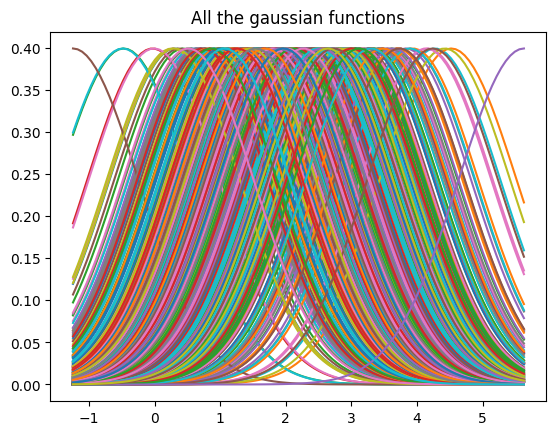

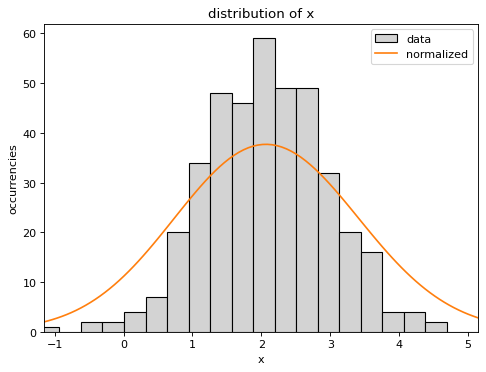

In [3]:
# LINUZ CODE

# creating data
N = 400   # set the number of points
mean, devs = 2, 0.9
x = np.random.normal(loc=mean, scale=devs, size=N)  # (args) respectively: mean, std, size of vector

# creating the histogram
plt.figure(figsize=(7,5), dpi=80)
n, bins, patches = plt.hist(x, bins='auto', facecolor='lightgrey', edgecolor='black')

# introducing the errorbars
y_error = np.sqrt(n)
plt.errorbar( x=((bins[:-1] + bins[1:])/2), y=n, yerr=y_error, fmt='.', capsize=2, color='dimgrey', elinewidth=4)

# histogram aesthetics
dev_margin = 3.5  # variable to expand the x limits of hist
plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of x')

plt.show()





# creating the gaussian stuff
gaussian_resolution = 100
#dev_margin = 3.5

px = np.linspace( min(x), max(x), gaussian_resolution)  # linear space of x values for graph
cy = np.zeros(shape = np.shape(px))   # comulative y value (init to 0)

for value in x:
    current_gaussian = stats.norm.pdf(px, value) # I trust the default std value
    plt.plot(px, current_gaussian)
    cy += current_gaussian    # summing here for the cumulative distrib, so I don't need to store the gaussian curves in memory
#plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.title("All the gaussian functions")





# plot sum of the gaussians normalized

# calculating area of histogram by trapezoidal rule
area_gaussian = np.trapz(cy, px)
print('area gaussian (pre-norm):', area_gaussian )

# calculating histogram area by summing bin height*spacing
area_hist, dx = 0, (bins[-1]-bins[0])/len(bins)
for n_bin in n:
    area_hist += dx*n_bin
print('area histogram:', area_hist )

# (re)creating the histogram
plt.figure(figsize=(7,5), dpi=80)
plt.hist(x, bins=len(bins), facecolor='lightgrey', edgecolor='black', label='data')
plt.plot(px, cy*area_hist/area_gaussian, label='normalized')
plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of x')
plt.legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

The category 1 has the two gaussians: 0 +- 7 and 4 +- 9
The category 2 has the two gaussians: 0 +- 5 and 7 +- 6
The category 3 has the two gaussians: -2 +- 4 and 8 +- 8


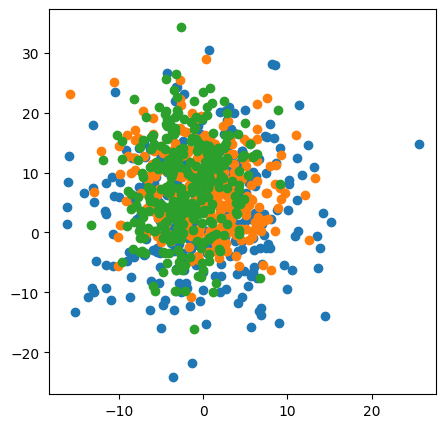

In [4]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

category = 3 # Number of cathegories shown in the plot
points = 300 # Resolution of the plotted graphics

fig = plt.figure(figsize=(5, 5))
n=0
while n < category:
    std_x, mean_x = np.random.randint(1, 10), np.random.randint(-10, 10)
    std_y, mean_y = np.random.randint(1, 10), np.random.randint(-10, 10)
    gaussian_x = np.random.normal(mean_x, std_x, points,)
    gaussian_y = np.random.normal(mean_y, std_y, points)
    plt.scatter(gaussian_x, gaussian_y)
    print('The category', n+1, 'has the two gaussians:', mean_x, '+-', std_x, 'and', mean_y, '+-', std_y)
    n += 1

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

   residuals  distances
0   1.100000       16.0
1  -1.950000        6.3
2  -7.200000        3.4
3  -4.150000        8.4
4  -6.590000        1.7
5 -11.020000        4.4
6  -2.270000        0.6
7  -2.160000       19.0
8  -0.042857        3.3
9   0.128571        5.3
    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0
11  -0.130000        9.3
12  -0.090000       10.2
13   0.210000       12.2
14   0.170000        7.9
15   0.042857        4.5


/home/giosue/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<ErrorbarContainer object of 3 artists>

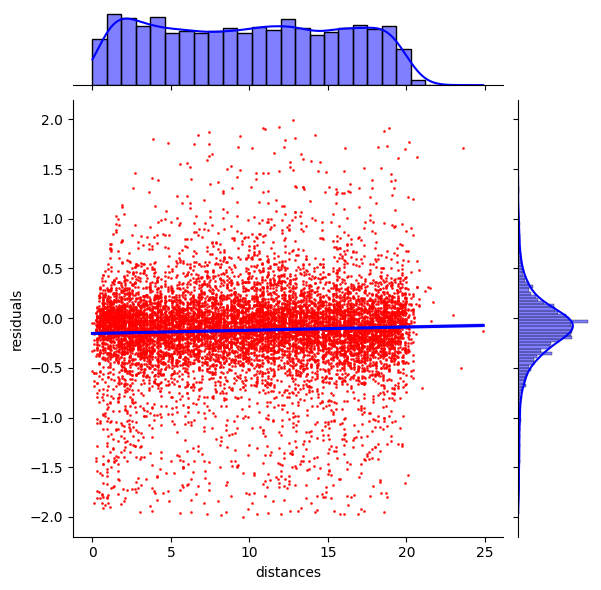

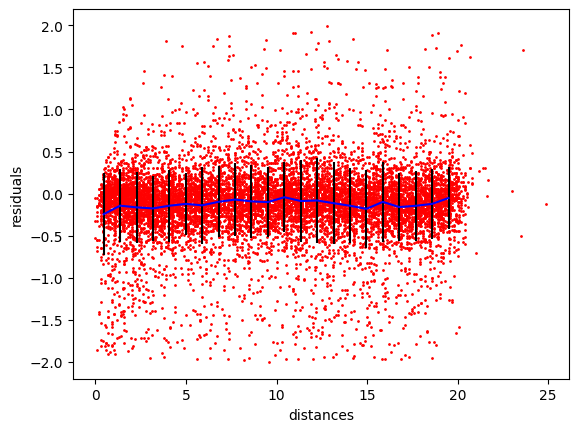

In [16]:
# ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy # Download the data
# data = np.load('residuals_261.npy')

dati = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())

print(dati.head(10)) # Inspected the two variables: 'residuals' and 'distances'
cleaned = dati[np.abs(dati['residuals'])<2]
print(cleaned.head(10)) # Control the sequence selected

regression = stats.linregress(cleaned['distances'], cleaned['residuals'])
sns.jointplot(x='distances', y='residuals', data=cleaned, kind="reg", scatter_kws={"color": "red", "s": 1}, line_kws={ "color": "blue"}, marginal_kws={'color': 'blue'})

resid, dist = np.histogram(cleaned[cleaned['distances']<20]['distances'], bins='auto')
x = (dist[1:]+dist[:-1])/2
y, _, _ = stats.binned_statistic( x = cleaned["distances"], values = cleaned["residuals"], statistic='mean', bins=dist)
erry, _, _ = stats.binned_statistic( x = cleaned["distances"], values = cleaned["residuals"], statistic='std', bins=dist)

cleaned.plot.scatter(x="distances", y="residuals", c='red', marker='o', s=1)
plt.errorbar(x,y, yerr = erry,  color='blue' ,ecolor='black')